                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     55.46
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           4.72e-10
Time:                        09:41:14   Log-Likelihood:                -7.7554
No. Observations:                  61   AIC:                             19.51
Df Residuals:                      59   BIC:                             23.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3380      0.127      2.668      0.0

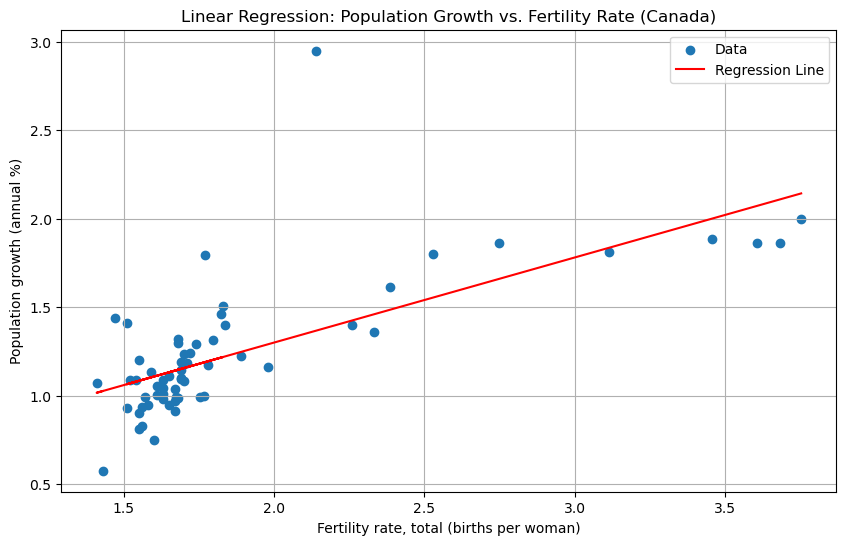

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv(r'..\data\processed\Canada-Select-Variables-In-Columns.csv')

df['Fertility rate, total (births per woman)'] = pd.to_numeric(df['Fertility rate, total (births per woman)'], errors='coerce')
df['Population growth (annual %)'] = pd.to_numeric(df['Population growth (annual %)'], errors='coerce')

df = df.dropna(subset=['Fertility rate, total (births per woman)', 'Population growth (annual %)'])

fertility_rate = df['Fertility rate, total (births per woman)'].values
population_growth = df['Population growth (annual %)'].values

X = sm.add_constant(fertility_rate)
y = population_growth

model = sm.OLS(y, X).fit()

summary = model.summary()
print(summary)

conf_int = model.conf_int()
print(conf_int)

plt.figure(figsize=(10, 6))
plt.scatter(fertility_rate, population_growth, label='Data')
plt.plot(fertility_rate, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Fertility rate, total (births per woman)')
plt.ylabel('Population growth (annual %)')
plt.legend()
plt.title('Linear Regression: Population Growth vs. Fertility Rate (Canada)')
plt.grid(True)
plt.show()

# Result interpretation:

R-squared: 0.485
Adjusted R-squared: 0.476
Approximately 48.5% of the variability in the dependent variable y (Population Growth) can be explained by the independent variable x1 (Fertility Rate). The Adjusted R-squared, which accounts for the number of predictors in the model, is slightly lower at 47.6%, indicating that the model is a reasonably good fit.

F-statistic: 55.46
Prob (F-statistic): 4.72e-10
The F-statistic measures the overall significance of the model. A value of 55.46 with a very low p-value indicates that the model is statistically significant and that the independent variable x1 (Fertility Rate) significantly explains the variation in the dependent variable y (Population Growth).

Constant (Intercept): 0.3380
Coefficient for x1 (Fertility Rate): 0.4807
The intercept value (0.3380) represents the expected value of y (Population Growth) when x1 (Fertility Rate) is zero. The coefficient for x1 (0.4807) indicates that for every one-unit increase in the fertility rate, the population growth is expected to increase by 0.4807 units, assuming other factors remain constant.

Standard Error for Intercept: 0.127
Standard Error for x1: 0.065
The standard error measures the accuracy of the coefficient estimates. Smaller standard errors indicate more precise estimates. In this case, both standard errors are relatively low, suggesting precise estimates of the coefficients.

t-statistic for Intercept: 2.668, p-value: 0.010
t-statistic for x1: 7.447, p-value: 0.000
The t-statistics and associated p-values test whether the coefficients are significantly different from zero. The low p-values (< 0.05) for both the intercept and the coefficient for x1 indicate that they are statistically significant.

95% Confidence Interval for Intercept: [0.085, 0.591]
95% Confidence Interval for x1: [0.352, 0.610]
The confidence intervals provide a range within which we expect the true population parameter to lie, with 95% confidence. For the coefficient of x1, it ranges from 0.352 to 0.610, indicating a positive relationship between fertility rate and population growth.


# Business Implications
Policy Making: The results show a significant positive relationship between fertility rate and population growth in Canada. Policymakers can use this information to design policies that manage population growth effectively by addressing factors that influence fertility rates.
Resource Allocation: Understanding the dynamics between fertility rate and population growth can help in forecasting population trends and planning for resources such as healthcare, education, and infrastructure.
Economic Planning: The relationship between fertility rate and population growth can impact labor markets and economic growth. Businesses and government can use this analysis to predict future demographic changes and their potential economic impact.
Healthcare Planning: The positive correlation indicates that changes in fertility rates can significantly affect population growth, which in turn influences demand for healthcare services. This can help in strategic planning for healthcare facilities and services.